<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Collaboration-and-Competition" data-toc-modified-id="Collaboration-and-Competition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Collaboration and Competition</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.-Start-the-Environment" data-toc-modified-id="1.-Start-the-Environment-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>1. Start the Environment</a></span></li><li><span><a href="#2.-Examine-the-State-and-Action-Spaces" data-toc-modified-id="2.-Examine-the-State-and-Action-Spaces-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>2. Examine the State and Action Spaces</a></span></li><li><span><a href="#3.-Take-Random-Actions-in-the-Environment" data-toc-modified-id="3.-Take-Random-Actions-in-the-Environment-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>3. Take Random Actions in the Environment</a></span></li><li><span><a href="#4.-It's-Your-Turn!" data-toc-modified-id="4.-It's-Your-Turn!-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>4. It's Your Turn!</a></span></li></ul></li></ul></li><li><span><a href="#Previous-runs" data-toc-modified-id="Previous-runs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Previous runs</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Run-3" data-toc-modified-id="Run-3-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Run 3</a></span></li><li><span><a href="#Run-4" data-toc-modified-id="Run-4-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Run 4</a></span></li></ul></li></ul></li><li><span><a href="#Watch-the-smart-agent" data-toc-modified-id="Watch-the-smart-agent-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Watch the smart agent</a></span></li></ul></div>

# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random
import time
import torch

from collections import deque
from unityagents import UnityEnvironment

In [2]:
SEED = 1

In [5]:
# Initialize all random seeds
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available(): torch.cuda.manual_seed_all(SEED)

### Use Twin Delayed DDPG?

In [2]:
use_td3 = True

In [3]:
if use_td3:
    from td_ddpg_agent import Agent
else:
    from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
tennisenv = "Tennis_Windows_x86_64\Tennis.exe"

In [4]:
env = UnityEnvironment(file_name=tennisenv)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print()
print()
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24


The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [10]:
if not use_td3:
    agent = Agent(state_size=state_size, action_size=action_size, random_seed=SEED)
else:
    agent = Agent(state_size=state_size, action_size=action_size, max_action = 1.0)

In [8]:
# Set up outside ddpg, in case we abort we can still chart...
mean_scores = []                               
moving_avgs = []
s_episode = 0
m_episode = 0

In [9]:
def ddpg(n_episodes=2000, max_t=1000, print_every=10, score_target=0.5, score_window=100, score_max=0.8):
    
    global mean_scores, moving_avgs, s_episode, m_episode
    mean_scores = []
    moving_avgs = []
    s_episode, m_episode = 0, 0
    
    best_score  = -np.inf
    scores_deque = deque(maxlen=score_window)                 # mean scores from most recent episodes - target is 100
    got_score_target = False
    sectionstarting = time.time()
    
    for i_episode in range(1, n_episodes+1):                  
        env_info = env.reset(train_mode=True)[brain_name]      # reset environment
        states = env_info.vector_observations                  # get current state for each agent
        escore = np.zeros(num_agents)                          # initialize the score (for each agent)
        agent.reset()
        startingtime = time.time()
        
        for t in range(max_t):
            actions = agent.act(states, add_noise=True)        # select an action (for each agent)
            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            
            agent.step(states, actions, rewards, next_states, dones, t, num_agents)
            
            states = next_states
            escore += rewards                                   # update the episode score (for each agent)
            if np.any(dones):
                break
                
        timetaken = int(round(time.time() - startingtime, 0))
        
        mean_escore = np.mean(escore)                          # mean of episode scores
        
        mean_scores.append(mean_escore)                        # save episode mean score
        scores_deque.append(mean_scores[-1])                   # save mean score to window of latest scores
        moving_avgs.append(np.mean(scores_deque))              # also save moving average
            
        print('\rEpisode {} ({} sec)\tCurrent Score: {:.2f}\tMean Score: {:.2f}\tMoving Average Score: {:.2f}'.format(i_episode, timetaken, mean_escore, mean_scores[-1], moving_avgs[-1]), end="")
        
        if i_episode % print_every == 0:
            last_every_avg = np.mean(mean_scores[- print_every])
            sectiontaken = int(round(time.time() - sectionstarting, 0))
            sectionstarting = time.time()
            print('\rEpisode {} ({} sec)\tCurrent Score: {:.2f}\tMean Score: {:.2f}\tMoving Average Score: {:.2f}'.format(i_episode, sectiontaken, mean_escore, last_every_avg, moving_avgs[-1]))

        if mean_escore > best_score:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            best_score = mean_escore
            
        if moving_avgs[-1] >= score_target and i_episode >= score_window and got_score_target==False:
            print('\nEnvironment solved in {} episodes!\tAverage Score: {:.2f}'.format(i_episode-score_window, moving_avgs[-1]))
            print()
            torch.save(agent.actor_local.state_dict(), 'solved_checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'solved_checkpoint_critic.pth')
            s_episode = i_episode
            got_score_target=True

        if moving_avgs[-1] >= score_max and got_score_target:
            print('\nMaximum Score in {} episodes!\tAverage Score: {:.2f}'.format(i_episode, moving_avgs[-1]))
            torch.save(agent.actor_local.state_dict(), 'max_checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'max_checkpoint_critic.pth')
            m_episode = i_episode
            break
         
        if got_score_target:
            check_trend = moving_avgs[-10:]
            x = np.arange(0,len(check_trend))
            y = np.array(check_trend)
            z = np.polyfit(x,y,1)
            if z[0] <= -0.008:
                print('\nEarly Stopping as negative trend in scores: {:.5f}'.format(z[0]))
                break
            
                
    return mean_scores, moving_avgs, s_episode, m_episode

## DDPG standard run

In [10]:
start = time.time()

run_scores, run_avgs, score_episode, maxscore_episode = ddpg()

end = time.time()
elapsed = (end - start) / 60.0 
print("\nElapsed Time: {0:3.2f} mins.".format(elapsed))

Episode 10 (2 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 20 (1 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 30 (1 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 40 (4 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 50 (7 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 60 (7 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 70 (7 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 80 (7 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 90 (7 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 100 (7 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 110 (7 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 120 (7 sec)	Current Score: -0.00	Mean Score:

In [11]:
plt.rcParams['figure.figsize'] = [8, 5]

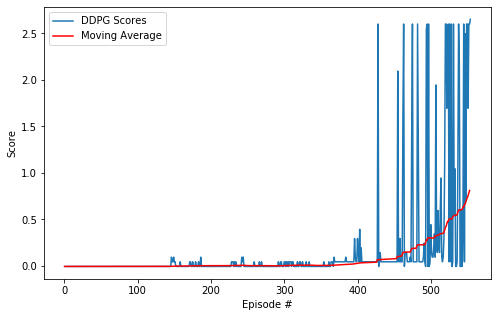

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(run_scores)+1), run_scores, label='DDPG Scores')
plt.plot(np.arange(len(run_scores)), run_avgs, c='r', label='Moving Average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')

plt.show()

In [13]:
top_scores = run_scores[-200:]
top_avgs = run_avgs[-200:]

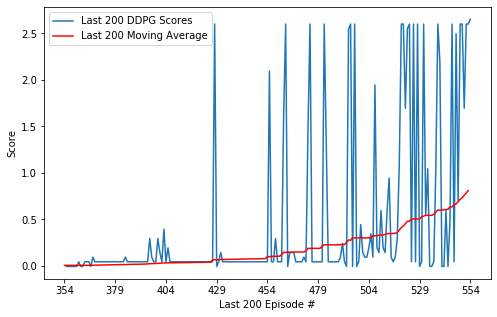

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(top_scores)+1), top_scores, label='Last 200 DDPG Scores')
plt.plot(np.arange(len(top_scores)), top_avgs, c='r', label='Last 200 Moving Average')
plt.ylabel('Score')
plt.xlabel('Last 200 Episode #')
plt.legend(loc='upper left')
plt.draw()

adjustby = len(run_scores)  - len(top_scores)
xlabels = list(ax.get_xticklabels())
newlabels = [int(item.get_position()[0] + adjustby) for item in xlabels]
ax.set_xticklabels(newlabels)
plt.show()

## TD3 run

In [13]:
start = time.time()

run_scores, run_avgs, score_episode, maxscore_episode = ddpg(score_max=2.5)

end = time.time()
elapsed = (end - start) / 60.0 
print("\nElapsed Time: {0:3.2f} mins.".format(elapsed))

Episode 10 (1 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.01
Episode 20 (1 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.01
Episode 30 (3 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.00
Episode 40 (8 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.00
Episode 50 (8 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 60 (8 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 70 (8 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 80 (8 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 90 (8 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 100 (8 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 110 (8 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 120 (8 sec)	Current Score: -0.00	Mean Score: -0.

KeyboardInterrupt: 

In [14]:
# Set up outside ddpg, as we aborted inform the variables we would have returned...
run_scores = mean_scores
run_avgs = moving_avgs
score_episode = s_episode
maxscore_episode = m_episode

In [28]:
score_episode

1168

In [22]:
plt.rcParams['figure.figsize'] = [8, 5]

In [29]:
achieved_scores = run_scores[:1170]
achieved_avgs = run_avgs[:1170]

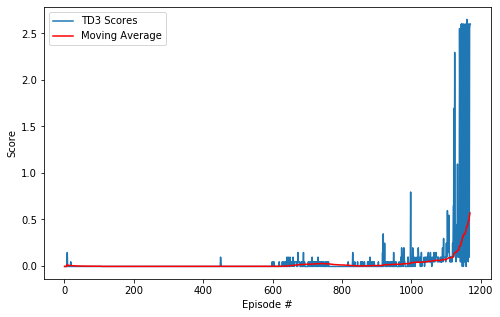

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(achieved_scores)+1), achieved_scores, label='TD3 Scores')
plt.plot(np.arange(len(achieved_scores)), achieved_avgs, c='r', label='Moving Average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')

plt.show()

In [31]:
top_achieved_scores = achieved_scores[-200:]
top_achieved_avgs = achieved_avgs[-200:]

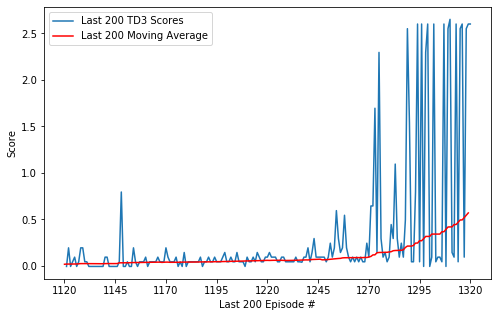

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(top_achieved_scores)+1), top_achieved_scores, label='Last 200 TD3 Scores')
plt.plot(np.arange(len(top_achieved_scores)), top_achieved_avgs, c='r', label='Last 200 Moving Average')
plt.ylabel('Score')
plt.xlabel('Last 200 Episode #')
plt.legend(loc='upper left')
plt.draw()

adjustby = len(run_scores)  - len(top_scores)
xlabels = list(ax.get_xticklabels())
newlabels = [int(item.get_position()[0] + adjustby) for item in xlabels]
ax.set_xticklabels(newlabels)
plt.show()

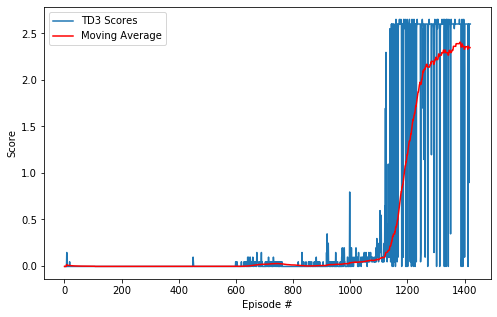

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(run_scores)+1), run_scores, label='TD3 Scores')
plt.plot(np.arange(len(run_scores)), run_avgs, c='r', label='Moving Average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')

plt.show()

In [18]:
top_scores = run_scores[-300:]
top_avgs = run_avgs[-300:]

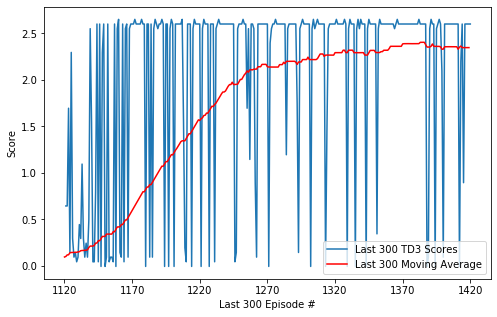

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(top_scores)+1), top_scores, label='Last 300 TD3 Scores')
plt.plot(np.arange(len(top_scores)), top_avgs, c='r', label='Last 300 Moving Average')
plt.ylabel('Score')
plt.xlabel('Last 300 Episode #')
plt.legend(loc='lower right')
plt.draw()

adjustby = len(run_scores)  - len(top_scores)
xlabels = list(ax.get_xticklabels())
newlabels = [int(item.get_position()[0] + adjustby) for item in xlabels]
ax.set_xticklabels(newlabels)
plt.show()

# Previous DDPG runs

### Run 3
- 600 espisodes
- reached maximum of 0.86 then dropped away to 0.70
  
```
Episode 10 (4 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 20 (1 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 30 (1 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 40 (4 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 50 (7 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 60 (7 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 70 (7 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 80 (7 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 90 (7 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 100 (7 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 110 (8 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 120 (8 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 130 (9 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 140 (9 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 150 (16 sec)	Current Score: 0.05	Mean Score: -0.00	Moving Average Score: -0.00
Episode 160 (9 sec)	Current Score: -0.00	Mean Score: 0.05	Moving Average Score: -0.000
Episode 170 (8 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: -0.00
Episode 180 (11 sec)	Current Score: -0.00	Mean Score: 0.05	Moving Average Score: 0.00
Episode 190 (12 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.00
Episode 200 (8 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.00
Episode 210 (8 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.00
Episode 220 (8 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.00
Episode 230 (10 sec)	Current Score: 0.05	Mean Score: -0.00	Moving Average Score: 0.00
Episode 240 (9 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.01
Episode 250 (12 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.00
Episode 260 (8 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.00
Episode 270 (9 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.01
Episode 280 (8 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.00
Episode 290 (9 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.00
Episode 300 (12 sec)	Current Score: 0.05	Mean Score: -0.00	Moving Average Score: 0.00
Episode 310 (13 sec)	Current Score: -0.00	Mean Score: 0.05	Moving Average Score: 0.01
Episode 320 (11 sec)	Current Score: -0.00	Mean Score: 0.05	Moving Average Score: 0.01
Episode 330 (11 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.011
Episode 340 (9 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.01
Episode 350 (8 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.01
Episode 360 (10 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.01
Episode 370 (15 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.011
Episode 380 (16 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.01
Episode 390 (17 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.02
Episode 400 (28 sec)	Current Score: 0.30	Mean Score: 0.05	Moving Average Score: 0.03
Episode 410 (28 sec)	Current Score: 0.05	Mean Score: 0.15	Moving Average Score: 0.04
Episode 420 (16 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.04
Episode 430 (66 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.077
Episode 440 (18 sec)	Current Score: 0.05	Mean Score: 0.15	Moving Average Score: 0.07
Episode 450 (17 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.08
Episode 460 (63 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.11
Episode 470 (102 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.15
Episode 480 (96 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.19
Episode 490 (93 sec)	Current Score: 0.10	Mean Score: 0.05	Moving Average Score: 0.23
Episode 500 (180 sec)	Current Score: 0.45	Mean Score: 0.25	Moving Average Score: 0.30
Episode 510 (85 sec)	Current Score: 0.60	Mean Score: 0.15	Moving Average Score: 0.33
Episode 520 (128 sec)	Current Score: 2.60	Mean Score: 0.20	Moving Average Score: 0.39
Episode 526 (82 sec)	Current Score: 2.60	Mean Score: 2.60	Moving Average Score: 0.51
Environment solved in 426 episodes!	Average Score: 0.51

Episode 527 (1 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.51
Episode 528 (59 sec)	Current Score: 2.60	Mean Score: 2.60	Moving Average Score: 0.51
Episode 529 (0 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.51
Episode 530 (358 sec)	Current Score: 0.05	Mean Score: 2.60	Moving Average Score: 0.51
Episode 531 (57 sec)	Current Score: 2.60	Mean Score: 2.60	Moving Average Score: 0.53
Episode 532 (12 sec)	Current Score: 0.55	Mean Score: 0.55	Moving Average Score: 0.54
Episode 533 (24 sec)	Current Score: 1.05	Mean Score: 1.05	Moving Average Score: 0.55
Episode 534 (1 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.54
Episode 535 (1 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.54
Episode 536 (2 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.54
Episode 537 (24 sec)	Current Score: 1.05	Mean Score: 1.05	Moving Average Score: 0.55
Episode 538 (56 sec)	Current Score: 2.60	Mean Score: 2.60	Moving Average Score: 0.58
Episode 539 (49 sec)	Current Score: 2.20	Mean Score: 2.20	Moving Average Score: 0.60
Episode 540 (227 sec)	Current Score: -0.00	Mean Score: 2.60	Moving Average Score: 0.60
Episode 541 (1 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.60
Episode 542 (14 sec)	Current Score: 0.60	Mean Score: 0.60	Moving Average Score: 0.61
Episode 543 (1 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.61
Episode 544 (12 sec)	Current Score: 0.50	Mean Score: 0.50	Moving Average Score: 0.61
Episode 545 (59 sec)	Current Score: 2.60	Mean Score: 2.60	Moving Average Score: 0.64
Episode 546 (1 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.64
Episode 547 (54 sec)	Current Score: 2.50	Mean Score: 2.50	Moving Average Score: 0.66
Episode 548 (15 sec)	Current Score: 0.70	Mean Score: 0.70	Moving Average Score: 0.67
Episode 549 (56 sec)	Current Score: 2.60	Mean Score: 2.60	Moving Average Score: 0.69
Episode 550 (269 sec)	Current Score: 2.60	Mean Score: -0.00	Moving Average Score: 0.72
Episode 551 (37 sec)	Current Score: 1.70	Mean Score: 1.70	Moving Average Score: 0.73
Episode 552 (57 sec)	Current Score: 2.60	Mean Score: 2.60	Moving Average Score: 0.76
Episode 553 (56 sec)	Current Score: 2.60	Mean Score: 2.60	Moving Average Score: 0.78
Episode 554 (58 sec)	Current Score: 2.65	Mean Score: 2.65	Moving Average Score: 0.81
Episode 555 (56 sec)	Current Score: 2.60	Mean Score: 2.60	Moving Average Score: 0.82
Episode 556 (1 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.82
Episode 557 (3 sec)	Current Score: 0.10	Mean Score: 0.10	Moving Average Score: 0.82
Episode 558 (56 sec)	Current Score: 2.60	Mean Score: 2.60	Moving Average Score: 0.84
Episode 559 (30 sec)	Current Score: 1.35	Mean Score: 1.35	Moving Average Score: 0.85
Episode 560 (372 sec)	Current Score: 0.75	Mean Score: 1.70	Moving Average Score: 0.86
Episode 561 (2 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.86
Episode 562 (7 sec)	Current Score: 0.30	Mean Score: 0.30	Moving Average Score: 0.85
Episode 563 (5 sec)	Current Score: 0.20	Mean Score: 0.20	Moving Average Score: 0.82
Episode 564 (6 sec)	Current Score: 0.25	Mean Score: 0.25	Moving Average Score: 0.83
Episode 565 (12 sec)	Current Score: 0.55	Mean Score: 0.55	Moving Average Score: 0.83
Episode 566 (6 sec)	Current Score: 0.25	Mean Score: 0.25	Moving Average Score: 0.83
Episode 567 (6 sec)	Current Score: 0.25	Mean Score: 0.25	Moving Average Score: 0.83
Episode 568 (4 sec)	Current Score: 0.15	Mean Score: 0.15	Moving Average Score: 0.83
Episode 569 (4 sec)	Current Score: 0.10	Mean Score: 0.10	Moving Average Score: 0.83
Episode 570 (53 sec)	Current Score: -0.00	Mean Score: 0.05	Moving Average Score: 0.83
Episode 571 (2 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.83
Episode 572 (4 sec)	Current Score: 0.15	Mean Score: 0.15	Moving Average Score: 0.83
Episode 573 (1 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.83
Episode 574 (3 sec)	Current Score: 0.10	Mean Score: 0.10	Moving Average Score: 0.82
Episode 575 (1 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.79
Episode 576 (4 sec)	Current Score: 0.15	Mean Score: 0.15	Moving Average Score: 0.79
Episode 577 (6 sec)	Current Score: 0.25	Mean Score: 0.25	Moving Average Score: 0.80
Episode 578 (8 sec)	Current Score: 0.35	Mean Score: 0.35	Moving Average Score: 0.80
Episode 579 (4 sec)	Current Score: 0.15	Mean Score: 0.15	Moving Average Score: 0.80
Episode 580 (36 sec)	Current Score: 0.10	Mean Score: 0.05	Moving Average Score: 0.80
Episode 581 (9 sec)	Current Score: 0.40	Mean Score: 0.40	Moving Average Score: 0.80
Episode 582 (2 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.78
Episode 583 (3 sec)	Current Score: 0.10	Mean Score: 0.10	Moving Average Score: 0.77
Episode 584 (3 sec)	Current Score: 0.10	Mean Score: 0.10	Moving Average Score: 0.77
Episode 585 (1 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.77
Episode 586 (3 sec)	Current Score: 0.10	Mean Score: 0.10	Moving Average Score: 0.77
Episode 587 (1 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.77
Episode 588 (4 sec)	Current Score: 0.15	Mean Score: 0.15	Moving Average Score: 0.77
Episode 589 (5 sec)	Current Score: 0.20	Mean Score: 0.20	Moving Average Score: 0.77
Episode 590 (31 sec)	Current Score: -0.00	Mean Score: 0.40	Moving Average Score: 0.77
Episode 591 (1 sec)	Current Score: -0.00	Mean Score: -0.00	Moving Average Score: 0.76
Episode 592 (3 sec)	Current Score: 0.10	Mean Score: 0.10	Moving Average Score: 0.77
Episode 593 (5 sec)	Current Score: 0.20	Mean Score: 0.20	Moving Average Score: 0.77
Episode 594 (4 sec)	Current Score: 0.15	Mean Score: 0.15	Moving Average Score: 0.74
Episode 595 (11 sec)	Current Score: 0.50	Mean Score: 0.50	Moving Average Score: 0.72
Episode 596 (6 sec)	Current Score: 0.25	Mean Score: 0.25	Moving Average Score: 0.72
Episode 597 (15 sec)	Current Score: 0.70	Mean Score: 0.70	Moving Average Score: 0.71
Episode 598 (3 sec)	Current Score: 0.05	Mean Score: 0.05	Moving Average Score: 0.71
Episode 599 (7 sec)	Current Score: 0.30	Mean Score: 0.30	Moving Average Score: 0.71
Episode 600 (58 sec)	Current Score: 0.05	Mean Score: -0.00	Moving Average Score: 0.70
```

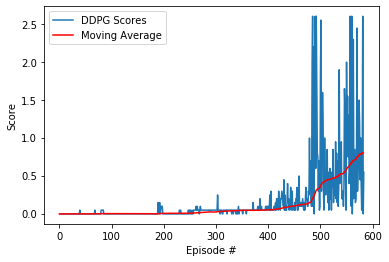

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(best_scores)+1), best_scores, label='DDPG Scores')
plt.plot(np.arange(len(best_scores)), best_avgs, c='r', label='Moving Average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')

plt.show()

### Run 4
- Run for 1,600 epsiodes
- Model performance increased then de-stablized and reduced to nothing

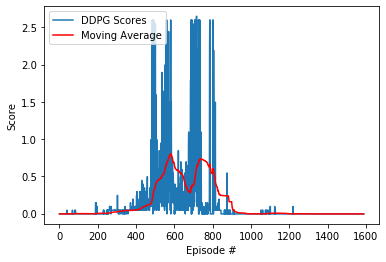

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(mean_scores)+1), mean_scores, label='DDPG Scores')
plt.plot(np.arange(len(mean_scores)), moving_avgs, c='r', label='Moving Average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')

plt.show()

# Watch the smart agent

### To watch TD3

In [17]:
agent.actor_local.load_state_dict(torch.load('td_ddpg_checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('td_ddpg_checkpoint_critic.pth'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

### To watch DDPG

In [17]:
agent.actor_local.load_state_dict(torch.load('max_checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('max_checkpoint_critic.pth'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [18]:
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations
scores = np.zeros(num_agents) 
episode = 0

for _ in range(2):
    while True:
        actions = agent.act(states, add_noise=False)
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        scores += env_info.rewards
        states = next_states  
        episode += 1

        if np.any(dones): 
            break 

print('Episodes: {}; Average Score: {}'.
              format(episode, np.mean(scores))) 

Episodes: 2002; Average Score: 5.250000078231096


In [19]:
env.close()